## Title - Analyse a data set which contains the hourly and daily count of rental bikes in a Capital bikeshare system with the corresponding weather and seasonal information
The goal of our analysis is to predict the count of total rental bikes including both casual and registered

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [84]:
df_day=pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
df_day.shape

(731, 16)

**df_day :**bike sharing counts aggregated on daily basis. Records: 731 days

In [86]:
df_hr=pd.read_csv('hour.csv')
df_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [87]:
df_hr.shape

(17379, 17)

**df_hr :**bike sharing counts aggregated on hourly basis. Records: 17379 hours

## Features :

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

There are 17 columns in the dataset,out of which **cnt** is our target variable along with **casual** & **registered.**<br>
All the features are described in the section below.

- **instant :** record index
- **dteday :** date
- **season :** season <br> 
  (1:springer, 2:summer, 3:fall, 4:winter)
- **yr :** year (0: 2011, 1:2012)
- **mnth :** month ( 1 to 12)
- **hr :** hour (0 to 23)
- **holiday :** weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday :** day of the week
- **workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathersit :** <br> 
  1: Clear, Few clouds, Partly cloudy, Partly cloudy <br> 
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br> 
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br> 
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp :** Normalized temperature in Celsius. The values are divided to 41 (max)
- **atemp :** Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- **hum :** Normalized humidity. The values are divided to 100 (max)
- **windspeed :** Normalized wind speed. The values are divided to 67 (max)
- **casual :** count of casual users (people who hadn't previously signed up with the bike sharing program)
- **registered :** count of registered users (people who had already signed up)
- **cnt :** count of total rental bikes including both casual and registered

In [88]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [89]:
df_hr.duplicated().any()

False

**The dataset consists of 17379 records. 
We neither have any missing values nor any duplicates**

In [90]:
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [91]:
df_hr.drop(['instant','dteday','holiday'],axis=1,inplace=True)
df_day.drop(['instant','dteday','holiday'],axis=1,inplace=True)

In [92]:
df_hr.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [93]:
# copy the dataframe so that we can modify the same temporarily for visualization
df_hrv=df_hr.copy()    
df_dayv=df_day.copy() 

In [94]:
df_hrv

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Univariate & Bi-variate Analysis :

### Categorical Variables

Let's first encode the categorical variables for visualization

In [95]:
df_hrv['season']=df_hrv['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df_hrv['weekday']=df_hrv['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df_hrv['workingday']=df_hrv['workingday'].map({0:'Holiday',1:'W_day'})
df_hrv['weathersit']=df_hrv['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
df_hrv['mnth']=df_hrv['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [96]:
df_hrv

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sun,Holiday,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,spring,0,Jan,1,Sun,Holiday,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,spring,0,Jan,2,Sun,Holiday,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,spring,0,Jan,3,Sun,Holiday,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,spring,0,Jan,4,Sun,Holiday,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,Dec,19,Tue,W_day,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,spring,1,Dec,20,Tue,W_day,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,spring,1,Dec,21,Tue,W_day,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,spring,1,Dec,22,Tue,W_day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


### Let's apply all the processing to **'df_day'** dataframe

In [97]:

df_dayv['season']=df_dayv['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df_dayv['weekday']=df_dayv['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df_dayv['workingday']=df_dayv['workingday'].map({0:'Holiday',1:'W_day'})
df_dayv['weathersit']=df_dayv['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
df_dayv['mnth']=df_dayv['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [98]:
df_dayv.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,Sun,Holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,0,Jan,Mon,Holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,spring,0,Jan,Tue,W_day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,spring,0,Jan,Wed,W_day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,spring,0,Jan,Thu,W_day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Season**

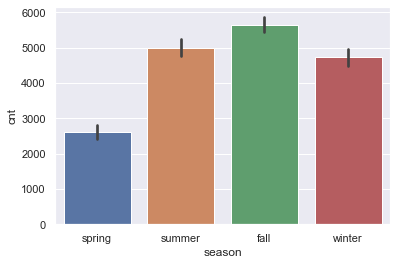

In [99]:
sns.barplot(x='season',y='cnt',data=df_dayv)
plt.show()

Bike rentals are more during **Fall** season

**Hour**

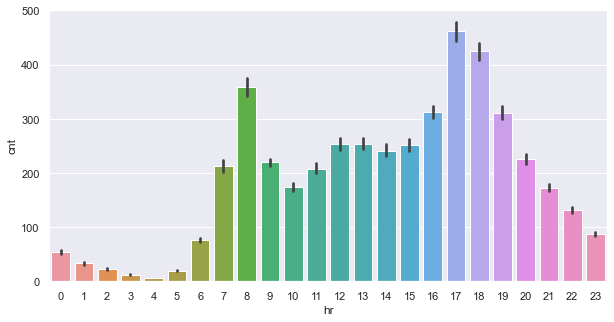

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x='hr',y='cnt',data=df_hrv)
plt.show()

Bike rentals gradually starts increasing in the morning hours by 7 AM onwards make peak demand around 8 AM then consistent throuhout the day till 3 PM. <br>
Demand in bike rental again started increasing sharply around 4 PM onwards make peak demand around 5 PM-6 PM and then demand starts decreasing gradually as we approach to 11 PM.<br>
Lowest demand observed during midninght hours till early morning hours i.e.(11 PM to 6 AM)

Let's convert 'hr' feature to categorical having total 3 types : Morning(8-15), Evening(16-23) & Night(24-7)

In [101]:
def assign_label(hr):
    if hr in range(8,16):
        label=1
    elif hr in range(16,24):
        label=2
    elif (hr in range(0,8) or hr==24):
        label=3
    return label

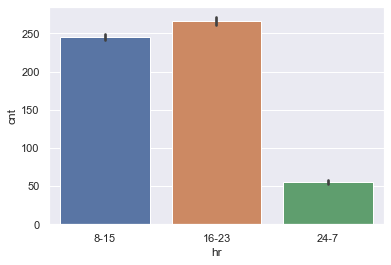

In [102]:
ax=sns.barplot(x=df_hrv['hr'].apply(assign_label),y=df_hrv['cnt'])
ax.set_xticklabels(['8-15','16-23','24-7'])
plt.show()

We can clearly see that frequency of bike rentals is at it's lowest during midnight to early morning hours

**Weekday** & **Working day**

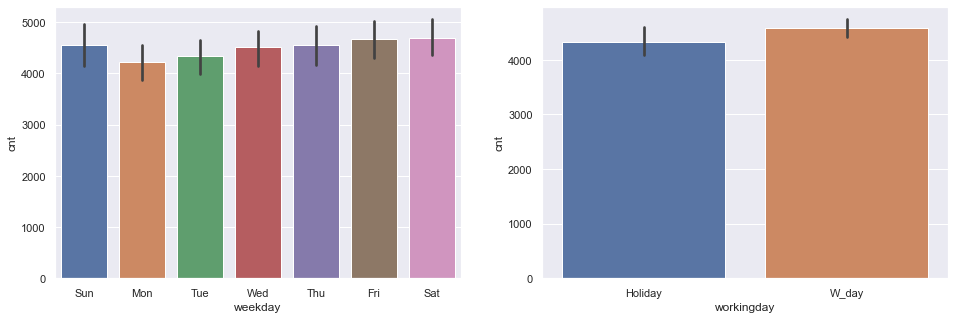

In [103]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x='weekday',y='cnt',data=df_dayv)

plt.subplot(1,2,2)
sns.barplot(x='workingday',y='cnt',data=df_dayv)
plt.show()

In [104]:
df_dayv.groupby('weekday')['cnt'].sum().sort_values()

weekday
Mon    444027
Tue    455503
Wed    469109
Thu    473048
Sun    477807
Fri    485395
Sat    487790
Name: cnt, dtype: int64

In [105]:
df_dayv.groupby('weekday')['cnt'].sum().mean()

470382.71428571426

On an average, count for bike rental seems to be lesser on 'Monday' & higher on  'Fri', 'Sat' & 'Sun'.<br>
Bikes seems to be rented more in working days compare to that on holiday 

**Weathersit**

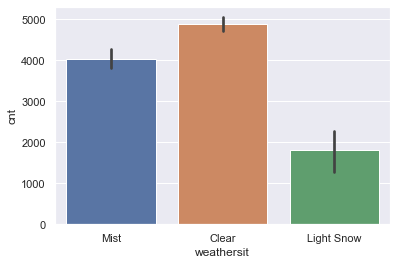

In [106]:
sns.barplot(x='weathersit',y='cnt',data=df_dayv)
plt.show()

Demand for bike rental is at it's peak when weather conditions are clear & mist.<br>
Bikes seems to be rented less in light snow as well as heavy rain condition.

**Casual & Registered users**

In [107]:
reg_cnt=df_dayv['registered'].sum()    # Count of bike rentals by registered users
cas_cnt=df_dayv['casual'].sum()        # Count of bike rentals by casual users

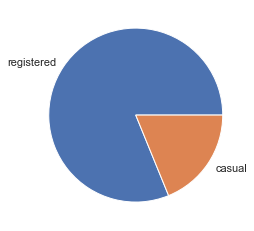

In [108]:
plt.pie([reg_cnt,cas_cnt],labels=['registered','casual'])
plt.show()

Registered users are more in numbers compare to that of casual users.

**Year**

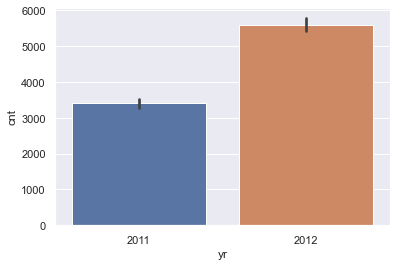

In [109]:
ax=sns.barplot(x='yr',y='cnt',data=df_dayv)
ax.set_xticklabels([2011,2012])
plt.show()

It seems that users get incresed in 2012 with respect to 2011

**Month**

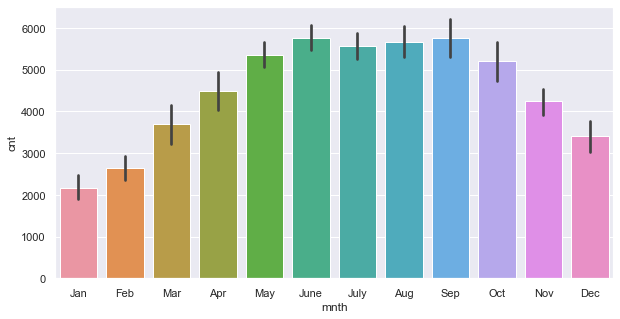

In [110]:
plt.figure(figsize=(10,5))
sns.barplot(x='mnth',y='cnt',data=df_dayv)
plt.show()

Period from **May to October** has seen very good demand in bike rentals

### Numerical Variables

**temp** & **atemp**

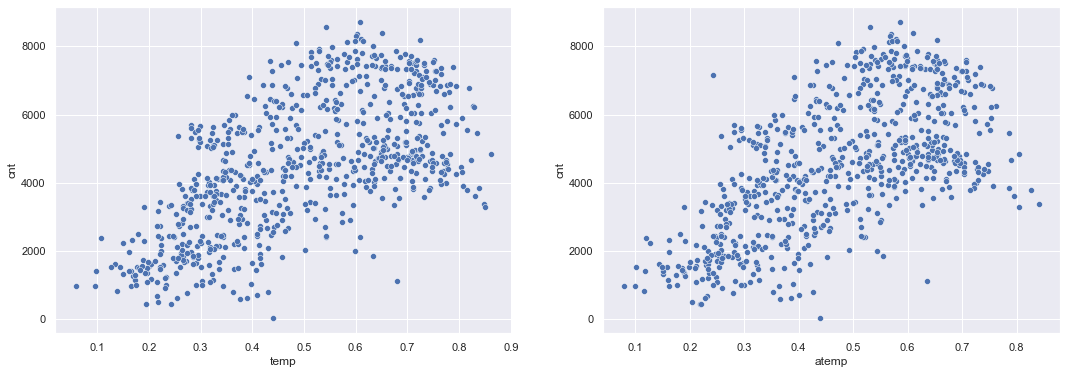

In [111]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='temp',y='cnt',data=df_dayv)

plt.subplot(1,2,2)
sns.scatterplot(x='atemp',y='cnt',data=df_dayv)
plt.show()


It can be seen that higher count of bike rentals observed at higher temperature & higher 'feel-like' temperature.<br>
Also the distribution of both graphs is quite similar, so we can think of dropping one of the feature going forward.

**Humidity**

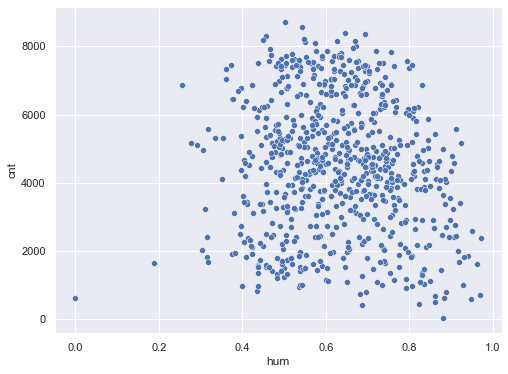

In [112]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='hum',y='cnt',data=df_dayv)
plt.show()

It can be seen that higher count of bike rentals observed at higher humidity values.<br>

**Windspeed**

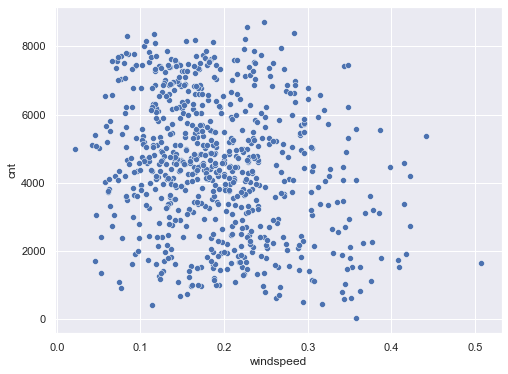

In [113]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='windspeed',y='cnt',data=df_dayv)
plt.show()

It can be seen that demands for bike rental is higher at lower windspeed.<br>

### Let's see the distribution of our target variable

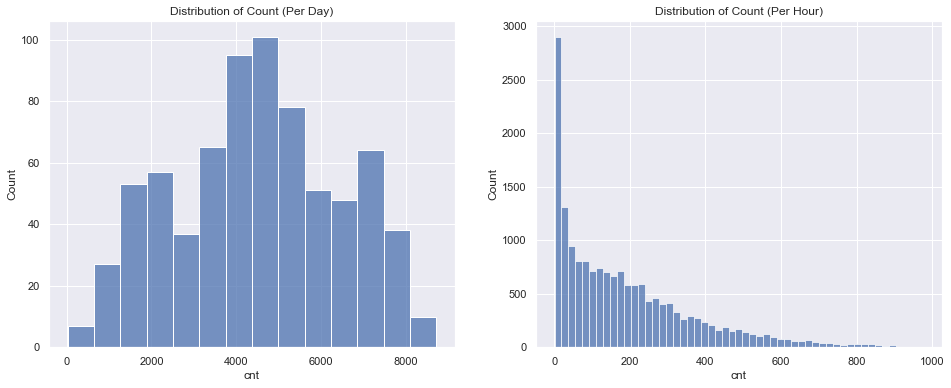

In [114]:
# Per Day basis
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(df_dayv['cnt'])
plt.title('Distribution of Count (Per Day)')

# Per Hr basis
plt.subplot(1,2,2)
sns.histplot(df_hrv['cnt'])
plt.title('Distribution of Count (Per Hour)')
plt.show()


Distribution of Count (Per Day):**Normally distributed** <br>
Distribution of Count (Per Hr) :**Right Skewed**

### Now let's check the correlation of our continuious varibles with target variable

In [115]:
data=['temp','atemp','hum','windspeed','cnt']
df_day[data].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


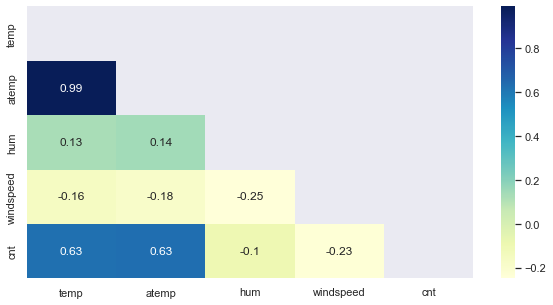

In [116]:
plt.figure(figsize=(10,5))
sns.heatmap(df_day[data].corr(),annot=True,cmap="YlGnBu",mask=np.triu(np.ones_like(df_day[data].corr())))
plt.show()

Features having **+ve correlation** with target variable:
-  'temp', 
-  'atemp'

Features having **-ve correlation** with target variable:
-  'windspeed'

Features having **no correlation** with the target variable:
-  'hum'

**It can be observed that 'temp & 'atemp' are highly correlated and we should drop one of them to avoid multicollinearity**<br>

**Also 'casual' & 'registered' varables combinely results into the 'cnt' variable, so we can drop both of them to have 'cnt' as  our only target variable going forward**

In [117]:
df_hr.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [118]:
df_day.drop(['atemp','casual','registered'],axis=1,inplace=True)
df_hr.drop(['atemp','casual','registered'],axis=1,inplace=True)

In [119]:
df_hr.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,6,0,1,0.24,0.75,0.0,1


**Splitting the dataset**

In [120]:
X=df_hr.drop('cnt',axis=1)

In [121]:
y=df_hr['cnt']

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [124]:
X_train.shape,X_test.shape

((13034, 10), (4345, 10))

As per problem statement, we need to predict bike rental count hourly or daily based on the environmental and seasonal settings.<br>
So we will go for **Regression algorithms**.

**Linear Regression**

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [126]:
LR=LinearRegression()
ohe=OneHotEncoder(sparse=False)

In [127]:
X_train1=ohe.fit_transform(X_train[['season', 'yr','hr','mnth','weekday','workingday','weathersit']])

In [128]:
X_test1=ohe.fit_transform(X_test[['season', 'yr','hr','mnth','weekday','workingday','weathersit']])

In [129]:
X_train1.shape, y_train.shape

((13034, 55), (13034,))

In [130]:
LR.fit(X_train1,y_train)

LinearRegression()

In [131]:
# RMSE & R2 Score
y_pred1=LR.predict(X_train1)
y_hat=LR.predict(X_test1)
r2_train_LR=r2_score(y_train,y_pred1)
r2_test_LR=r2_score(y_test,y_hat)

MSE_train_LR=mean_squared_error(y_train,y_pred1)
RMSE_train_LR=np.sqrt(MSE_train_LR)

MSE_test_LR=mean_squared_error(y_test,y_hat)
RMSE_test_LR=np.sqrt(MSE_test_LR)

print('r2_score for train data:',r2_train_LR)
print('r2_score for test data:',r2_test_LR)
print('-'*20)
print('MSE for train data:',MSE_train_LR)
print('RMSE for train data:',RMSE_train_LR)
print('-'*20)
print('MSE for test data:',MSE_test_LR)
print('RMSE for test data:',RMSE_test_LR)


r2_score for train data: 0.671615873525786
r2_score for test data: 0.6656114198160008
--------------------
MSE for train data: 10883.737686051865
RMSE for train data: 104.32515365937337
--------------------
MSE for test data: 10753.372151898735
RMSE for test data: 103.69846745202523


In [132]:
# Adjusted R2  Score
train_adjusted_r2 = 1-((1-r2_train_LR)*(13034-1)/(13034-1-55))
test_adjusted_r2 = 1-((1-r2_test_LR)*(4345-1)/(4345-1-55))

print('Adjusted R2 for train data:',train_adjusted_r2)
print('Adjusted R2 for test data:',test_adjusted_r2)

Adjusted R2 for train data: 0.6702242009293857
Adjusted R2 for test data: 0.6613233871953154


We will try to see weather feature elimination will help us in improving R2_score along with reduction in RMSE error

**Feature Elimination**

In [133]:
from sklearn.feature_selection import RFE
rfe = RFE(LR,  n_features_to_select=30)
fit = rfe.fit(X_train1, y_train)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 30
Selected Features: [False False False False False False  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True]
Feature Ranking: [26 25 24 23 22 21  1  1  1  1  1  1  1  7 16  8  5  6 13 12 10 11 15 18
 17 14  9  4  3  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 19 20  1  1  1  1]


In [134]:
LR1=LinearRegression()
LR1.fit(rfe.transform(X_train1),y_train)

LinearRegression()

In [135]:
# RMSE & R2 Score
y_pred9=LR1.predict(rfe.transform(X_train1))
y_hat=LR1.predict(rfe.transform(X_test1))
r2_train_LR1=r2_score(y_train,y_pred9)
r2_test_LR1=r2_score(y_test,y_hat)

MSE_train_LR1=mean_squared_error(y_train,y_pred9)
RMSE_train_LR1=np.sqrt(MSE_train_LR1)

MSE_test_LR1=mean_squared_error(y_test,y_hat)
RMSE_test_LR1=np.sqrt(MSE_test_LR1)

print('r2_score for train data:',r2_train_LR1)
print('r2_score for test data:',r2_test_LR1)
print('-'*20)
print('MSE for train data:',MSE_train_LR1)
print('RMSE for train data:',RMSE_train_LR1)
print('-'*20)
print('MSE for test data:',MSE_test_LR1)
print('RMSE for test data:',RMSE_test_LR1)

r2_score for train data: 0.4092050140196607
r2_score for test data: 0.3967631002358222
--------------------
MSE for train data: 19580.902775912997
RMSE for train data: 139.93177900646086
--------------------
MSE for test data: 19399.080181962025
RMSE for test data: 139.2805807783771


As R2 score has decreased significantly alnog with increase in RMSE error value, it can be observed that applying RFE technique didn't help us in improving our model performance

**Decision Tree Regressor**

In [136]:
from sklearn.tree import DecisionTreeRegressor

In [137]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [138]:
# RMSE & R2 Score
y_pred2=dt.predict(X_train)
y_hat2=dt.predict(X_test)

r2_train=r2_score(y_train,y_pred2)
r2_test=r2_score(y_test,y_hat2)

MSE_train=mean_squared_error(y_train,y_pred2)
RMSE_train=np.sqrt(MSE_train)

MSE_test=mean_squared_error(y_test,y_hat2)
RMSE_test=np.sqrt(MSE_test)

print('r2_score for train data:',r2_train)
print('r2_score for test data:',r2_test)
print('-'*20)
print('MSE for train data:',MSE_train)
print('RMSE for train data:',RMSE_train)
print('-'*20)
print('MSE for test data:',MSE_test)
print('RMSE for test data:',RMSE_test)

r2_score for train data: 0.9999940218514392
r2_score for test data: 0.8806432139428649
--------------------
MSE for train data: 0.1981356452355378
RMSE for train data: 0.44512430312839335
--------------------
MSE for test data: 3838.3127157652475
RMSE for test data: 61.95411782735065


In [139]:
# Adjusted R2  Score
train_adjusted_r2 = 1-((1-r2_train)*(13034-1)/(13034-1-10))
test_adjusted_r2 = 1-((1-r2_test)*(4345-1)/(4345-1-10))

print('Adjusted R2 for train data:',train_adjusted_r2)
print('Adjusted R2 for test data:',test_adjusted_r2)

Adjusted R2 for train data: 0.9999940172609849
Adjusted R2 for test data: 0.880367817574482


As we can see, model seems to be overfitted on training data, let's findout best parameters for decision tree model

-  Cross validation

In [140]:
%%time
from sklearn.model_selection import GridSearchCV

params = {  'max_depth': [3,5,10,20,30,50],
            'min_samples_split': [2,5,8,10,15,20,30,50,100],
            'min_samples_leaf': [1,5,8,10,15,20,30,50,100],
   }

tree_reg = DecisionTreeRegressor(random_state=42)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_reg, params, scoring="r2", n_jobs=-1, verbose=1, cv=5,return_train_score=True)
tree_cv.fit(X,y)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Wall time: 24 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 8, 10, 15, 20, 30, 50, 100],
                         'min_samples_split': [2, 5, 8, 10, 15, 20, 30, 50,
                                               100]},
             return_train_score=True, scoring='r2', verbose=1)

In [141]:
tree_cv.best_params_

{'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 30}

In [142]:
dt=DecisionTreeRegressor(criterion= 'absolute_error',splitter= 'best',max_depth= 30,min_samples_split= 30,min_samples_leaf= 5)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_leaf=5, min_samples_split=30)

In [143]:
# RMSE & R2 Score
y_pred3=dt.predict(X_train)
y_hat3=dt.predict(X_test)

r2_train_DT=r2_score(y_train,y_pred3)
r2_test_DT=r2_score(y_test,y_hat3)

MSE_train_DT=mean_squared_error(y_train,y_pred3)
RMSE_train_DT=np.sqrt(MSE_train_DT)

MSE_test_DT=mean_squared_error(y_test,y_hat3)
RMSE_test_DT=np.sqrt(MSE_test_DT)

print('r2_score for train data:',r2_train_DT)
print('r2_score for test data:',r2_test_DT)
print('-'*20)
print('MSE for train data:',MSE_train_DT)
print('RMSE for train data:',RMSE_train_DT)
print('-'*20)
print('MSE for test data:',MSE_test_DT)
print('RMSE for test data:',RMSE_test_DT)

r2_score for train data: 0.9358203632960315
r2_score for test data: 0.8998045120298201
--------------------
MSE for train data: 2127.1257480435784
RMSE for train data: 46.120773497888976
--------------------
MSE for test data: 3222.1177215189873
RMSE for test data: 56.763700738403124


**Random Forest Regressor**

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [146]:
# RMSE & R2 Score
y_pred4=rf.predict(X_train)
y_hat4=rf.predict(X_test)

r2_train=r2_score(y_train,y_pred4)
r2_test=r2_score(y_test,y_hat4)

MSE_train=mean_squared_error(y_train,y_pred4)
RMSE_train=np.sqrt(MSE_train)

MSE_test=mean_squared_error(y_test,y_hat4)
RMSE_test=np.sqrt(MSE_test)

print('r2_score for train data:',r2_train)
print('r2_score for test data:',r2_test)
print('-'*20)
print('MSE for train data:',MSE_train)
print('RMSE for train data:',RMSE_train)
print('-'*20)
print('MSE for test data:',MSE_test)
print('RMSE for test data:',RMSE_test)

r2_score for train data: 0.992001950035495
r2_score for test data: 0.9412660626754275
--------------------
MSE for train data: 265.08186844544286
RMSE for train data: 16.28133497123141
--------------------
MSE for test data: 1888.7842570756745
RMSE for test data: 43.46014561728567


-  Cross Validation

In [149]:
'''
%%time

params = {      'n_estimators': [100,200,300,400,500],
                'max_features': ['auto'],
                'max_depth' : [3,5,10,20,30,50],
   }

rf_reg = RandomForestRegressor(random_state=42)#object creation for decision tree with random state 3
rf_cv = GridSearchCV(rf_reg, params, scoring="r2", n_jobs=-1, verbose=1, cv=5,return_train_score=True)
rf_cv.fit(X,y)
'''

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Wall time: 4min 14s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, 30, 50],
                         'max_features': ['auto'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [150]:
# rf_cv.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}

In [151]:
rf=RandomForestRegressor(max_depth= 20, max_features= 'auto', n_estimators= 100,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [152]:
# RMSE & R2 Score
y_pred5=rf.predict(X_train)
y_hat5=rf.predict(X_test)

r2_train_RF=r2_score(y_train,y_pred5)
r2_test_RF=r2_score(y_test,y_hat5)

MSE_train_RF=mean_squared_error(y_train,y_pred5)
RMSE_train_RF=np.sqrt(MSE_train_RF)

MSE_test_RF=mean_squared_error(y_test,y_hat5)
RMSE_test_RF=np.sqrt(MSE_test_RF)

print('r2_score for train data:',r2_train_RF)
print('r2_score for test data:',r2_test_RF)
print('-'*20)
print('MSE for train data:',MSE_train_RF)
print('RMSE for train data:',RMSE_train_RF)
print('-'*20)
print('MSE for test data:',MSE_test_RF)
print('RMSE for test data:',RMSE_test_RF)


r2_score for train data: 0.991599249251701
r2_score for test data: 0.9411760225909024
--------------------
MSE for train data: 278.42870632046305
RMSE for train data: 16.686183096216553
--------------------
MSE for test data: 1891.6797941689363
RMSE for test data: 43.49344541616514


**Gradient Boost**

In [153]:
from sklearn.ensemble import GradientBoostingRegressor

In [154]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [155]:
# RMSE & R2 Score
y_pred6=gb.predict(X_train)
y_hat6=gb.predict(X_test)

r2_train_GB=r2_score(y_train,y_pred6)
r2_test_GB=r2_score(y_test,y_hat6)

MSE_train_GB=mean_squared_error(y_train,y_pred6)
RMSE_train_GB=np.sqrt(MSE_train_GB)

MSE_test_GB=mean_squared_error(y_test,y_hat6)
RMSE_test_GB=np.sqrt(MSE_test_GB)

print('r2_score for train data:',r2_train_GB)
print('r2_score for test data:',r2_test_GB)
print('-'*20)
print('MSE for train data:',MSE_train_GB)
print('RMSE for train data:',RMSE_train_GB)
print('-'*20)
print('MSE for test data:',MSE_test_GB)
print('RMSE for test data:',RMSE_test_GB)

r2_score for train data: 0.8518148387945058
r2_score for test data: 0.8524154025510633
--------------------
MSE for train data: 4911.347088674068
RMSE for train data: 70.08100376474404
--------------------
MSE for test data: 4746.071469854945
RMSE for test data: 68.89173731192257


**XGboost**

In [156]:
from xgboost import XGBRegressor

In [157]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [158]:
# RMSE & R2 Score
y_pred7=xgb.predict(X_train)
y_hat7=xgb.predict(X_test)

r2_train=r2_score(y_train,y_pred7)
r2_test=r2_score(y_test,y_hat7)

MSE_train=mean_squared_error(y_train,y_pred7)
RMSE_train=np.sqrt(MSE_train)

MSE_test=mean_squared_error(y_test,y_hat7)
RMSE_test=np.sqrt(MSE_test)

print('r2_score for train data:',r2_train)
print('r2_score for test data:',r2_test)
print('-'*20)
print('MSE for train data:',MSE_train)
print('RMSE for train data:',RMSE_train)
print('-'*20)
print('MSE for test data:',MSE_test)
print('RMSE for test data:',RMSE_test)

r2_score for train data: 0.9770259001099635
r2_score for test data: 0.9483172553706585
--------------------
MSE for train data: 761.4377694225883
RMSE for train data: 27.59416187208063
--------------------
MSE for test data: 1662.0298053391725
RMSE for test data: 40.76799977113389


-  Cross Validation

In [159]:
'''
%%time
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb_reg=XGBRegressor(random_state=42,verbosity=0,silent=0)
xgb_cv= RandomizedSearchCV(estimator=xgb_reg, scoring='r2',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
xgb_cv.fit(X,y)
'''

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Wall time: 2min 49s


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                               

In [160]:
# xgb_cv.best_params_

{'reg_lambda': 0.4,
 'reg_alpha': 200,
 'n_estimators': 150,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.1}

In [161]:
xgb=XGBRegressor(reg_lambda= 0.4, reg_alpha= 200, n_estimators=150, max_depth=5, learning_rate=0.2, gamma=0.1)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=200, reg_lambda=0.4, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
# RMSE & R2 Score
y_pred8=xgb.predict(X_train)
y_hat8=xgb.predict(X_test)

r2_train_XGB=r2_score(y_train,y_pred8)
r2_test_XGB=r2_score(y_test,y_hat8)

MSE_train_XGB=mean_squared_error(y_train,y_pred8)
RMSE_train_XGB=np.sqrt(MSE_train_XGB)

MSE_test_XGB=mean_squared_error(y_test,y_hat8)
RMSE_test_XGB=np.sqrt(MSE_test_XGB)

print('r2_score for train data:',r2_train_XGB)
print('r2_score for test data:',r2_test_XGB)
print('-'*20)
print('MSE for train data:',MSE_train_XGB)
print('RMSE for train data:',RMSE_train_XGB)
print('-'*20)
print('MSE for test data:',MSE_test_XGB)
print('RMSE for test data:',RMSE_test_XGB)

r2_score for train data: 0.9613583405685951
r2_score for test data: 0.9451050716379099
--------------------
MSE for train data: 1280.712589614733
RMSE for train data: 35.7870449969641
--------------------
MSE for test data: 1765.32821068398
RMSE for test data: 42.015809056639384


### Conclusion

In [163]:
results=pd.DataFrame({'Models':['LR','DT','RF','GB','XGB'],'RMSE_Errors':[RMSE_test_LR,
                                                                                 RMSE_test_DT,
                                                                                 RMSE_test_RF,
                                                                                 RMSE_test_GB,
                                                                                 RMSE_test_XGB],
                                                                        'R2_Score':[r2_test_LR,
                                                                                 r2_test_DT,
                                                                                 r2_test_RF,
                                                                                 r2_test_GB,
                                                                                 r2_test_XGB,
                                                                                 ]})

In [164]:
results.sort_values(by='R2_Score',ascending=False)

,Models,RMSE_Errors,R2_Score
4,XGB,42.015809,0.945105
2,RF,43.493445,0.941176
1,DT,56.763701,0.899805
3,GB,68.891737,0.852415
0,LR,103.698467,0.665611


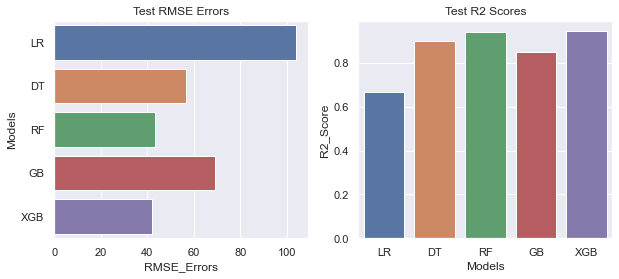

In [165]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='RMSE_Errors',y='Models',data=results,orient='h')
plt.title("Test RMSE Errors")

plt.subplot(1,2,2)
sns.barplot(x='Models',y='R2_Score',data=results)
plt.title("Test R2 Scores")
plt.show()

Criteria to select the **best model** would be:<br>
-Model having **highest R2_Score** along with the **lowest RMSE_Error**

The result shows that following are our top 2 model based on **'R2 Score' & 'RMSE Error'**

-  XGB Regressor
-  Random Forest Regressor

We should consider to deploy **XGB Regression** for prediction, as it is having the best **R2 Score : 0.945** along with the lowest **RMSE Error :42.02**